<a href="https://colab.research.google.com/github/anastasiia3006/product-recommendation/blob/main/Product_Recommendation_System_for_e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flask-ngrok flask
!pip install pyngrok

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok

In [ ]:
df_list = pd.read_csv('ecommerce_data/List of Orders.csv')

In [ ]:
print(df_list.head())

  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata


In [ ]:
df_order = pd.read_csv('ecommerce_data/Order Details.csv')
print(df_order.head())

  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones


In [ ]:
df_sales = pd.read_csv('ecommerce_data/Sales target.csv')
print(df_sales.head())

  Month of Order Date   Category   Target
0              Apr-18  Furniture  10400.0
1              May-18  Furniture  10500.0
2              Jun-18  Furniture  10600.0
3              Jul-18  Furniture  10800.0
4              Aug-18  Furniture  10900.0


In [ ]:
#join 2 tables df_list + df_order
merged_dfs = pd.merge(df_list, df_order, on = 'Order ID')
print(merged_dfs.head())

  Order ID  Order Date CustomerName        State       City  Amount  Profit  \
0  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad  1275.0 -1148.0   
1  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    66.0   -12.0   
2  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad     8.0    -2.0   
3  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    80.0   -56.0   
4  B-25602  01-04-2018        Pearl  Maharashtra       Pune   168.0  -111.0   

   Quantity     Category      Sub-Category  
0         7    Furniture         Bookcases  
1         5     Clothing             Stole  
2         3     Clothing       Hankerchief  
3         4  Electronics  Electronic Games  
4         2  Electronics            Phones  


In [ ]:
print(merged_dfs.info())
print('***************************************')
print(merged_dfs.describe())
print('***************************************')
print(merged_dfs.isnull().sum())
print('***************************************')
print(merged_dfs.duplicated())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Order Date    1500 non-null   object 
 2   CustomerName  1500 non-null   object 
 3   State         1500 non-null   object 
 4   City          1500 non-null   object 
 5   Amount        1500 non-null   float64
 6   Profit        1500 non-null   float64
 7   Quantity      1500 non-null   int64  
 8   Category      1500 non-null   object 
 9   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 117.3+ KB
None
***************************************
            Amount       Profit     Quantity
count  1500.000000  1500.000000  1500.000000
mean    287.668000    15.970000     3.743333
std     461.050488   169.140565     2.184942
min       4.000000 -1981.000000     1.000000
25%      45.000000    -9.250000     2.00000

In [ ]:
#Analysis of the most popular products
most_popular_sub_cat_product = merged_dfs.groupby('Sub-Category')['Quantity'].sum().reset_index()
most_popular_sub_cat_product = most_popular_sub_cat_product.sort_values(by='Quantity', ascending=False).head(5)
most_popular_sub_cat_product = most_popular_sub_cat_product.reset_index(drop=True)
most_popular_sub_cat_product.index = most_popular_sub_cat_product.index+1
print(most_popular_sub_cat_product)

  Sub-Category  Quantity
1        Saree       782
2  Hankerchief       754
3        Stole       671
4  Furnishings       310
5      T-shirt       305


In [ ]:
#Summary of purchase by customers and subcategories
customer_subcategory_sales = merged_dfs.groupby(['CustomerName', 'Sub-Category'])['Quantity'].sum().reset_index()

# Find the top 5 customers by total purchases
top_customers = (
    customer_subcategory_sales.groupby('CustomerName')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data for top 5 customers
filtered_data = customer_subcategory_sales[
    customer_subcategory_sales['CustomerName'].isin(top_customers)
]

# Creating a summary table to build a Stacked Bar Plot
pivot_data = filtered_data.pivot_table(
    index='CustomerName',
    columns='Sub-Category',
    values='Quantity',
    aggfunc='sum',
    fill_value=0  # Filling missed values ​​by zeros
)

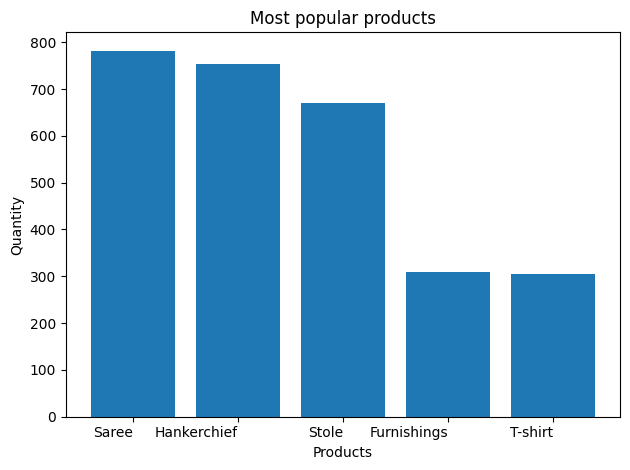

In [ ]:
#visualisation for most popular product
plt.bar(most_popular_sub_cat_product['Sub-Category'],most_popular_sub_cat_product['Quantity'])
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.title('Most popular products')
plt.xticks(rotation=0, ha = 'right')
plt.tight_layout()
plt.show()

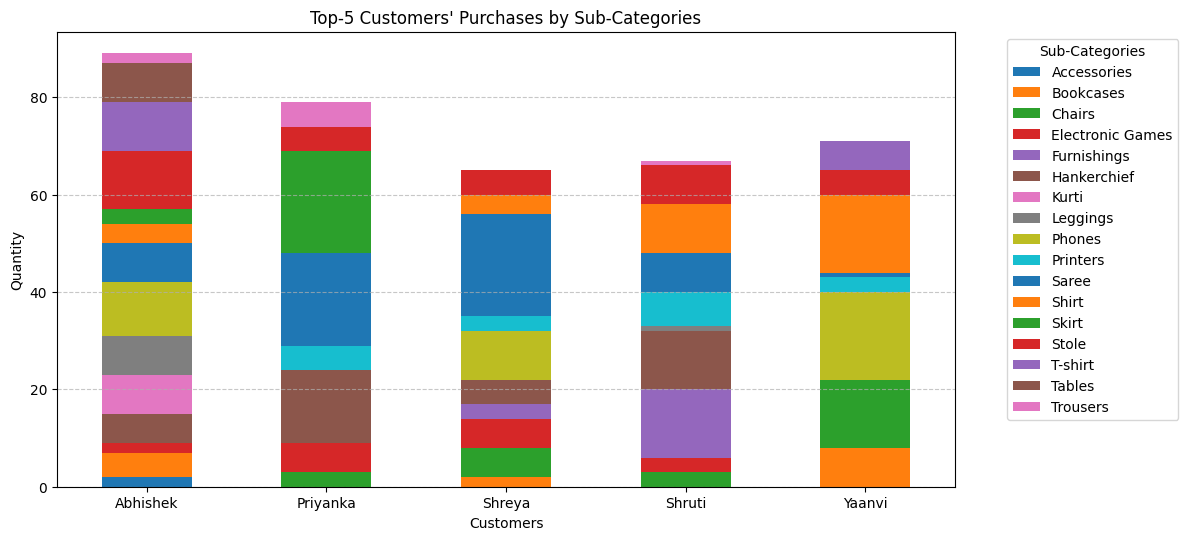

In [ ]:
#visualisation for summary of purchase by castomers and subcategories
# Construction stacked bar plot
pivot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    title="Top-5 Customers' Purchases by Sub-Categories"
)

# Settings of axes and legends
plt.xlabel('Customers')
plt.ylabel('Quantity')
plt.legend(title='Sub-Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Provides correct arrangement of graphics elements
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal lines for convenience
plt.xticks(rotation=0)
plt.show()


In [ ]:
#Collaborative Filtering

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
grouped_data = merged_dfs.groupby(['CustomerName', 'Sub-Category'])['Quantity'].sum().reset_index()

In [ ]:
customer_matrix = grouped_data.pivot(index = 'CustomerName', columns='Sub-Category',values='Quantity').fillna(0)
customer_matrix_space = csr_matrix(customer_matrix)

In [ ]:
print(grouped_data.head())
print(customer_matrix.head())

  CustomerName Sub-Category  Quantity
0    Aakanksha       Chairs         1
1    Aakanksha        Saree         7
2      Aarushi  Accessories         3
3      Aarushi    Bookcases         5
4      Aarushi       Chairs         3
Sub-Category  Accessories  Bookcases  Chairs  Electronic Games  Furnishings  \
CustomerName                                                                  
Aakanksha             0.0        0.0     1.0               0.0          0.0   
Aarushi               3.0        5.0     3.0               0.0          3.0   
Aashna                6.0        0.0     0.0               0.0          0.0   
Aastha                2.0        0.0     0.0               0.0          0.0   
Aayush                0.0        0.0     0.0               3.0          0.0   

Sub-Category  Hankerchief  Kurti  Leggings  Phones  Printers  Saree  Shirt  \
CustomerName                                                                 
Aakanksha             0.0    0.0       0.0     0.0       0.0  

In [ ]:
# Build the Collaborative Filtering Model

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)
model_knn.fit(customer_matrix_space)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

In [ ]:
def recommend_products(customer_name, num_recommendations=5):
  distances, indices = model_knn.kneighbors(customer_matrix.iloc[customer_name-1, :].values.reshape(1, -1), n_neighbors=10)
  similar_customers = indices.flatten()
  recommended_products = {}
  for similar_customer in similar_customers:
    for product in customer_matrix.columns:
      if customer_matrix.iloc[customer_name-1][product] == 0:
        recommended_products[product] = recommended_products.get(product, 0) + customer_matrix.iloc[similar_customer][product]
  sorted_recommendations = sorted(recommended_products.items(), key = lambda x: x[1], reverse=True)[:num_recommendations]
  print(f"Top {num_recommendations} product recommendations for Customer {customer_name}:")
  for product, score in sorted_recommendations:
      print(f"Product: {product}, Recommendation Score: {score}")

In [ ]:
recommend_products(customer_name=10, num_recommendations=3)

Top 3 product recommendations for Customer 10:
Product: Accessories, Recommendation Score: 3.0
Product: Saree, Recommendation Score: 3.0
Product: Hankerchief, Recommendation Score: 2.0


In [ ]:
#Elbow's method to determine the number of clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

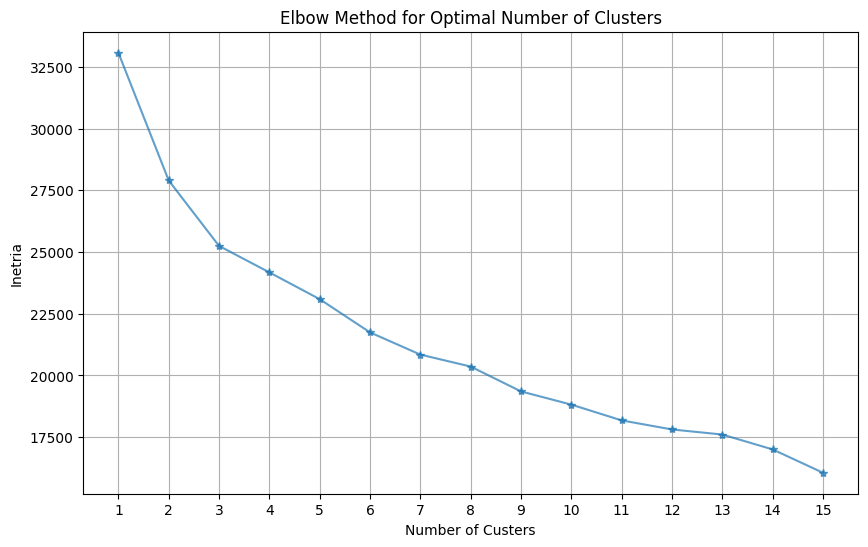

In [ ]:
inertia = []

for n in range(1, 16):
  kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, random_state=42)
  kmeans.fit(customer_matrix)
  inertia.append(kmeans.inertia_)

#visualisation
plt.figure(figsize=(10,6))
plt.plot(range(1,16),inertia, alpha = 0.7, marker='*')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Custers')
plt.ylabel('Inetria')
plt.xticks(range(1,16))
plt.grid()
plt.show()

In [ ]:
#Customer clustering

In [ ]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, random_state=42)
customer_clusters = kmeans.fit_predict(customer_matrix)

customer_matrix['Cluster'] = customer_clusters
print(customer_matrix.head())

Sub-Category  Accessories  Bookcases  Chairs  Electronic Games  Furnishings  \
CustomerName                                                                  
Aakanksha             0.0        0.0     1.0               0.0          0.0   
Aarushi               3.0        5.0     3.0               0.0          3.0   
Aashna                6.0        0.0     0.0               0.0          0.0   
Aastha                2.0        0.0     0.0               0.0          0.0   
Aayush                0.0        0.0     0.0               3.0          0.0   

Sub-Category  Hankerchief  Kurti  Leggings  Phones  Printers  Saree  Shirt  \
CustomerName                                                                 
Aakanksha             0.0    0.0       0.0     0.0       0.0    7.0    0.0   
Aarushi              12.0    0.0       0.0     0.0       6.0    8.0    0.0   
Aashna                0.0    3.0       0.0     0.0       3.0    3.0    7.0   
Aastha                6.0    0.0       0.0    10.0      

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(customer_matrix.drop('Cluster', axis=1))
reduced_data_with_clusters = np.column_stack((reduced_data, customer_clusters))

In [ ]:
customer_clusters = kmeans.fit_predict(customer_matrix)
customer_matrix['Cluster'] = customer_clusters
cluster_number = 0
for cluster_number in range(optimal_clusters):
  cluster_data = customer_matrix[customer_matrix['Cluster'] == cluster_number]
  print(f'Cluster{cluster_number}:')
  print(cluster_data.head())

Cluster0:
Sub-Category  Accessories  Bookcases  Chairs  Electronic Games  Furnishings  \
CustomerName                                                                  
Aarushi               3.0        5.0     3.0               0.0          3.0   
Aastha                2.0        0.0     0.0               0.0          0.0   
Aayush                0.0        0.0     0.0               3.0          0.0   
Amit                  0.0        0.0     0.0               0.0          0.0   
Amlan                 8.0        0.0     0.0               0.0          2.0   

Sub-Category  Hankerchief  Kurti  Leggings  Phones  Printers  Saree  Shirt  \
CustomerName                                                                 
Aarushi              12.0    0.0       0.0     0.0       6.0    8.0    0.0   
Aastha                6.0    0.0       0.0    10.0       0.0    2.0    0.0   
Aayush               10.0    0.0       0.0     0.0       0.0    3.0    0.0   
Amit                 11.0    0.0       0.0    

In [ ]:
#visualisation

def visualize_clusters(reduced_data_with_clusters, optimal_clusters, title="Customer Clustering with PCA and K-Means"):
    """
    Function to visualize customer clusters based on PCA-reduced data.

    Parameters:
    - reduced_data_with_clusters: ndarray containing reduced PCA data and cluster assignments
    - optimal_clusters: int, number of clusters to visualize
    - title: str, title of the visualization (default is 'Customer Clustering with PCA and K-Means')
    """
    plt.figure(figsize=(10, 6))
    for cluster in range(optimal_clusters):
        cluster_points = reduced_data_with_clusters[reduced_data_with_clusters[:, 2] == cluster]
        plt.scatter(
            cluster_points[:, 0],
            cluster_points[:, 1],
            label=f'Cluster {cluster} (Customers: {len(cluster_points)})',
            alpha=0.6
        )

    plt.title(title, fontsize=14)
    plt.xlabel('PCA Component 1', fontsize=12)
    plt.ylabel('PCA Component 2', fontsize=12)
    plt.legend(title='Customer clusters', fontsize=10)
    plt.grid(True)
    plt.show()


In [ ]:
#System testing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, pairwise_distances

In [ ]:
# Step 1: Validate the clustering with Silhouette Score
silhouette_avg = silhouette_score(data_scaled, customer_matrix['Cluster'])
print(f"Silhouette Score for Clustering: {silhouette_avg:.2f}")

Silhouette Score for Clustering: 0.19


In [ ]:
# Step 2: Test recommendation quality
def test_recommendation_system(test_customers):
    """
    Test the recommendation system for a list of test customers.
    """
    for customer in test_customers:
        print(f"\nTesting Recommendations for Customer: {customer}")
        recommend_products(customer_name=customer, num_recommendations=3)

In [ ]:
# Step 3: Analyze each cluster
def analyze_cluster_data():
    for cluster_number in range(optimal_clusters):
        cluster_data = customer_matrix[customer_matrix['Cluster'] == cluster_number]
        print(f"\nCluster {cluster_number} Analysis:")
        print(f"Number of Customers: {len(cluster_data)}")
        print("Cluster Averages:\n", cluster_data.mean())
        print("-" * 40)

analyze_cluster_data()


Cluster 0 Analysis:
Number of Customers: 50
Cluster Averages:
 Sub-Category
Accessories         1.26
Bookcases           1.22
Chairs              0.80
Electronic Games    1.10
Furnishings         1.16
Hankerchief         9.40
Kurti               1.06
Leggings            1.00
Phones              1.20
Printers            1.88
Saree               2.06
Shirt               1.08
Skirt               0.98
Stole               4.10
T-shirt             0.56
Tables              0.18
Trousers            0.52
Cluster             0.00
dtype: float64
----------------------------------------

Cluster 1 Analysis:
Number of Customers: 25
Cluster Averages:
 Sub-Category
Accessories         1.64
Bookcases           2.20
Chairs              1.04
Electronic Games    0.96
Furnishings         1.80
Hankerchief         1.60
Kurti               1.68
Leggings            0.60
Phones              1.08
Printers            1.12
Saree               1.48
Shirt               1.24
Skirt               0.60
Stole          

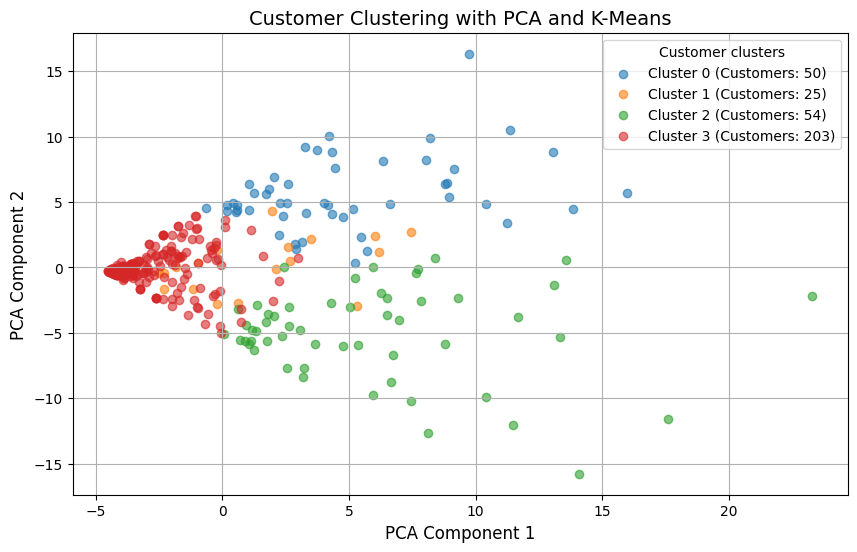

In [ ]:
visualize_clusters(reduced_data_with_clusters, optimal_clusters, title="Customer Clustering with PCA and K-Means")

In [ ]:
# Import of the required libraries
from flask import Flask, request, jsonify
from pyngrok import ngrok

# Initialization Flask
app = Flask(__name__)

@app.route('/recommend', methods=['GET'])
def recommend():
    customer_name = request.args.get('customer_name')
    num_recommendations = int(request.args.get('num_recommendations', 5))

    if not customer_name:
        return jsonify({"error": "Customer name is required"}), 400

    if customer_name not in customer_matrix.index:
        return jsonify({"error": "Customer not found"}), 404

    recommendations = recommend_products(customer_name, num_recommendations)
    return jsonify({
        "customer_name": customer_name,
        "recommendations": recommendations
    })

ngrok.set_auth_token("your-token")
public_url = ngrok.connect(5000)
print(f"API running on {public_url}")

if __name__ == "__main__":
    app.run(port=5000)


API running on NgrokTunnel: "https://86ee-34-21-4-217.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [05/Feb/2025 17:42:06] "GET /recommend?customer_name=Bharat&num_recommendations=5 HTTP/1.1" 200 -
